In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
from sklearn import metrics
%matplotlib inline

In [21]:
df= pd.read_csv('C:/Users/Morty/Desktop/netflow_day-02.csv', nrows=1000000)

In [22]:
df.head()

,Time,Duration,SrcDevice,DstDevice,Protocol,SrcPort,DstPort,SrcPackets,DstPackets,SrcBytes,DstBytes
0,118781,5580,Comp364445,Comp547245,17,Port05507,Port46272,0,755065,0,1042329018
1,118783,6976,Comp450942,Comp829338,6,Port03137,445,1665,1108,300810,250408
2,118785,14178,IP564116,Comp141988,17,5060,5060,1866,0,1477041,0
3,118785,28147,IP564116,Comp141988,17,5060,5060,3326,0,2656305,0
4,118785,48507,IP564116,Comp141988,17,5060,5060,5423,0,4388449,0


In [23]:
X = df[['SrcPackets','DstPackets','SrcBytes','DstBytes']]

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X))

In [25]:
#Assining Column Names
X_normalized.columns = ['SrcPackets','DstPackets','SrcBytes','DstBytes']

In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_normalized)
y_kmeans = kmeans.predict(X_normalized)

In [27]:
#Assigning cluster centers
centers = kmeans.cluster_centers_
print('Cluster centers of columns:\n')
print(pd.DataFrame(centers,columns= ['SrcPackets','DstPackets','SrcBytes','DstBytes']))

Cluster centers of columns:

   SrcPackets  DstPackets  SrcBytes  DstBytes
0    0.000047    0.000024  0.000123  0.000089
1    0.587057    0.472851  0.619616  0.408976


In [28]:
#1) Elbow Method: 

In [29]:
from sklearn import metrics
from scipy.spatial.distance import cdist

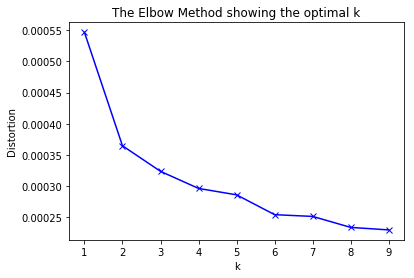

In [30]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_normalized)
    kmeanModel.fit(X_normalized)
    distortions.append(sum(np.min(cdist(X_normalized, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_normalized.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [31]:
#2) Average Silhouette Method:

In [32]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [33]:
cluster_range = range( 2, 10 )

for n_clusters in cluster_range:
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict( X_normalized )

  silhouette_avg = silhouette_score(X_normalized, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(X_normalized, cluster_labels)

MemoryError: 

In [16]:
#3 MeanShift

In [17]:
#Loading Min Max Scaling and Creating New Data Frame
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X))

In [18]:
X_normalized.columns = ['SrcPackets','DstPackets','SrcBytes','DstBytes']

In [19]:
from sklearn.cluster import MeanShift, estimate_bandwidth

ms = MeanShift(bin_seeding=True)
ms.fit(X_normalized)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 20
